In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
WIC= pd.read_csv ('WIC data .csv')

In [3]:
natality_2018 = pd.read_csv ('nat_quart_2018.csv')

C:\Users\jhoff\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
natality_2018

,Unnamed: 0,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
0,0,2018,1,1227,2,1,,30,1,2,...,N,N,N,N,N,N,1,N,Y,Y
1,1,2018,1,1704,2,1,,35,1,2,...,N,N,N,N,N,N,1,N,Y,Y
2,2,2018,1,336,2,1,,28,1,1,...,N,N,N,N,N,N,1,N,Y,Y
3,3,2018,1,938,2,1,,23,1,2,...,N,N,N,N,N,N,1,N,Y,N
4,4,2018,1,830,3,1,,37,1,1,...,N,N,N,N,N,N,1,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950378,950378,2018,11,1636,5,1,,39,2,1,...,N,N,N,N,N,N,1,N,Y,Y
950379,950379,2018,11,2128,2,1,,32,2,2,...,N,N,N,N,N,N,1,N,Y,Y
950380,950380,2018,11,510,5,1,,28,1,1,...,N,N,N,N,N,N,1,N,Y,Y
950381,950381,2018,11,1858,2,1,,34,1,2,...,N,N,N,N,N,N,1,N,Y,Y


In [4]:
del natality_2018['birth_time']
del natality_2018['birth_day_of_wk'] 
del natality_2018['mothers_age_imputed']
del natality_2018['mothers_nativity'] 
del natality_2018['mothers_race_imputed'] 
del natality_2018['mothers_hispanic_origin']
del natality_2018['mothers_maristat_imputed'] 
del natality_2018['fathers_hispanic_origin'] 
del natality_2018['unplanned_hyster'] 
del natality_2018['mother_transferred'] 
del natality_2018['plurality']
del natality_2018['pluarlity_imputed'] 
del natality_2018['sex_of_infant_imputed']
del natality_2018['last_norm_menses_mo']
del natality_2018['last_norm_menses_yr'] 
del natality_2018['combined_gestation_imputed'] 
del natality_2018['obst_est_of_gestation_used']
del natality_2018['obst_est_edit_wk'] 
del natality_2018['infant_transferred']

In [33]:
print(natality_2018.dtypes.to_string())

Unnamed: 0                         int64
birth_year                         int64
birth_month                        int64
birth_time                         int64
birth_day_of_wk                    int64
birth_place                        int64
mothers_age_imputed               object
mothers_age                        int64
mothers_nativity                   int64
mothers_residence_status           int64
mothers_race                       int64
mothers_race_imputed              object
mothers_hispanic_origin            int64
mothers_hispanic_origin2           int64
paternity_acknow                  object
mothers_marital_status            object
mothers_maristat_imputed          object
mothers_education                  int64
fathers_age                        int64
fathers_race                       int64
fathers_hispanic_origin            int64
fathers_hispanic_origin2           int64
fathers_education                  int64
prior_living_births                int64
prior_dead_birth

In [76]:
#### Data Set Grouping 

In [ ]:
# test code
df_nicu_count = linked_bd.groupby(['mothers_race', 'mothers_education', 'admit_NICU']).agg({'birth_year':'count'})

In [ ]:
# percentage test code
df_nicu_percent = df_nicu_count*100 / df_nicu_count.groupby(level=['mothers_race', 'mothers_education']).sum()
df_nicu_percent

In [11]:
df_delivery_payment_history = natality_2018.groupby(['delivery_payment_source']).agg({'attendant_at_birth':'count', 'fetal_present_at_birth':'count', 
                                                    'final_delivery_method':'count'})

In [72]:
natality_2018.groupby(["delivery_payment_source", 
                       "attendant_at_birth", "fetal_present_at_birth", 
                       "final_delivery_method"])[["fathers_education", "mothers_education", "mothers_age",
                                                   "fathers_age"]].mean()
#Delivery method, Attendant present, position of infant coming out, and final delivery method all in realtion to the 
#parents age, and education (averaged)

fathers_education  \
delivery_payment_source attendant_at_birth fetal_present_at_birth final_delivery_method                      
1                       1                  1                      1                               4.363200   
                                                                  2                               4.665081   
                                                                  3                               4.430485   
                                                                  4                               4.412039   
                                                                  9                               3.800000   
...                                                                                                    ...   
9                       5                  9                      9                               7.857143   
                        9                  1                      1                               7.619048   
                                           2                      1                               9.000000   
                                           9                      1                               8.666667   
                                                                  9                               8.571429   

                                                                                         mothers_education  \
delivery_payment_source attendant_at_birth fetal_present_at_birth final_delivery_method                      
1                       1                  1                      1                               3.420415   
                                                                  2                               3.516651   
                                                                  3                               3.560508   
                                                                  4                               3.508076   
                                                                  9                               3.233333   
...                                                                                                    ...   
9                       5                  9                      9                               7.000000   
                        9                  1                      1                               6.809524   
                                           2                      1                               9.000000   
                                           9                      1                               8.518519   
                                                                  9                               8.571429   

                                                                                         mothers_age  \
delivery_payment_source attendant_at_birth fetal_present_at_birth final_delivery_method                
1                       1                  1                      1                        26.822978   
                                                                  2                        26.401522   
                                                                  3                        26.417898   
                                                                  4                        28.715723   
                                                                  9                        27.800000   
...                                                                                              ...   
9                       5                  9                      9                        29.571429   
                        9                  1                      1                        30.809524   
                                           2                      1                        29.000000   
                                           9                      1                

In [73]:
natality_2018.groupby(["delivery_payment_source", 
                       "attendant_at_birth", "fetal_present_at_birth", 
                       "final_delivery_method"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Delivery method, Attendant present, position of infant coming out, and final delivery method all in realtion to the 
#mothers average bmi, pre pregnancy pounds, and delivery pounds

mothers_bmi  \
delivery_payment_source attendant_at_birth fetal_present_at_birth final_delivery_method                
1                       1                  1                      1                        29.381081   
                                                                  2                        28.669553   
                                                                  3                        27.757333   
                                                                  4                        31.862347   
                                                                  9                        30.426667   
...                                                                                              ...   
9                       5                  9                      9                        91.300000   
                        9                  1                      1                        85.961905   
                                           2                      1                        99.900000   
                                           9                      1                        96.101852   
                                                                  9                        99.900000   

                                                                                         pre_preg_lbs  \
delivery_payment_source attendant_at_birth fetal_present_at_birth final_delivery_method                 
1                       1                  1                      1                        179.272553   
                                                                  2                        176.108468   
                                                                  3                        166.266744   
                                                                  4                        193.455559   
                                                                  9                        202.666667   
...                                                                                               ...   
9                       5                  9                      9                        886.285714   
                        9                  1                      1                        839.428571   
                                           2                      1                        999.000000   
                                           9                      1                        954.296296   
                                                                  9                        999.000000   

                                                                                         delivery_lbs  
delivery_payment_source attendant_at_birth fetal_present_at_birth final_delivery_method                
1                       1                  1                      1                        195.388935  
                                                                  2                        189.240723  
                                                                  3                        186.378753  
                                                                  4                        209.582068  
                                                                  9                        228.566667  
...                                                                                               ...  
9                       5                  9                      9                        870.571429  
                        9                  1                      1                        762.857143  
                                           2                      1                        999.000000  
                                           9                      1                        969.185185  
                                                                  9                        934.785714  

[361 rows x 3 col

In [163]:
def infant_living(x): 
    if 'Y' in x:
        return 1
    elif 'N' in x:
        return 2
    else:
        return 3

In [164]:
living = ["infant_living_at_report"]
for living in living:
    natality_2018[living] = natality_2018[living].map(infant_living)

In [165]:
natality_2018['infant_living_at_report'].unique()

array([1, 2, 3], dtype=int64)

In [ ]:
df_nicu_count = linked_bd.groupby(['mothers_race', 'mothers_education', 'admit_NICU']).agg({'birth_year':'count'})

In [76]:
natality_2018.groupby(["attendant_at_birth"])[["fathers_education", "mothers_education", "mothers_age",
                                                   "fathers_age"]].mean()
#Attendant at birth scaled in comparison to the average education, and age of the parents. 

,fathers_education,mothers_education,mothers_age,fathers_age
attendant_at_birth,,,,
1,4.864742,4.467391,29.496953,38.984516
2,4.650198,4.265654,28.969727,38.356881
3,4.832444,4.580189,29.098866,36.930842
4,5.157050,5.160665,30.945915,35.576717
5,4.891253,4.283957,29.072129,40.295703
9,6.261146,5.036093,28.732484,61.104034


In [77]:
natality_2018.groupby(["attendant_at_birth"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Attendant at birth scaled in comparison to mothers bmi and weight pre and post preganancy. (averaged)

,mothers_bmi,pre_preg_lbs,delivery_lbs
attendant_at_birth,,,
1,29.044439,178.198185,197.492166
2,28.834140,174.580486,195.945277
3,28.148013,171.547140,192.589789
4,26.044642,164.381345,214.230080
5,29.791391,191.992815,211.509189
9,48.785987,412.658174,413.208068


In [6]:
def birth_history(x): 
    if 'Y' in x:
        return 1
    elif 'N' in x:
        return 2
    elif 'U' in x:
        return 3
    else:
        return 4

In [7]:
history = ["pre_preg_diab", "gest_diab", "pre_preg_hypten", "gest_hypten", 
 "hypten_ecl", "prev_preterm_birth", "infertility_treatment", 
 "fertil_enhance", "asst_repro_tech"]
for history in history:
    natality_2018[history] = natality_2018[history].map(birth_history)

In [82]:
natality_2018.groupby(["pre_preg_diab", "pre_preg_diab", "gest_diab", "pre_preg_hypten", "gest_hypten", 
 "hypten_ecl", "prev_preterm_birth"])[["fathers_education", "mothers_education", "mothers_age", "fathers_age"]].mean()
#gestation and fertil enhancments made to the mother in relation to parents age and education, part A. (averaged)

fathers_education  \
pre_preg_diab pre_preg_diab gest_diab pre_preg_hypten gest_hypten hypten_ecl prev_preterm_birth                      
N             N             N         N               N           N          N                            4.869703   
                                                                             Y                            4.857811   
                                                                  Y          N                            4.829369   
                                                                             Y                            4.526316   
                                                      Y           N          N                            4.839572   
                                                                             Y                            4.779045   
                                                                  Y          N                            4.875648   
                                                                             Y                            5.428571   
                                      Y               N           N          N                            4.827485   
                                                                             Y                            5.048175   
                                                                  Y          N                            4.943396   
                                                                             Y                            4.444444   
                            Y         N               N           N          N                            4.686586   
                                                                             Y                            4.411171   
                                                                  Y          N                            4.648352   
                                                                             Y                            6.888889   
                                                      Y           N          N                            4.564725   
                                                                             Y                            4.281863   
                                                                  Y          N                            4.764706   
                                      Y               N           N          N                            4.603440   
                                                                             Y                            4.619048   
                                                                  Y          N                            5.000000   
                                                                             Y                            4.000000   
U             U             U         U               U           U          U                            5.721239   
Y             Y             N         N               N           N          N                            4.420773   
                                                                             Y                            4.375451   
                                                                  Y          N                            4.588235   
                                                                             Y                            3.250000   
                                                      Y           N          N                            4.362500   
                                                                             Y                            4.530612   
                                                                  Y          N                            4.166667   
                                                                             Y                            3.000000   
                                      Y               N           N          N       

In [83]:
natality_2018.groupby(["infertility_treatment", "fertil_enhance", "asst_repro_tech"])[["fathers_education", "mothers_education", "mothers_age", "fathers_age"]].mean()
#gestation and fertil enhancments made to the mother in relation to parents age and education, part B. (averaged)

fathers_education  \
infertility_treatment fertil_enhance asst_repro_tech                      
N                     X              X                         4.829106   
U                     U              U                         5.721239   
Y                     N              Y                         6.208693   
                      U              U                         5.429644   
                      Y              N                         5.825274   
                                     Y                         6.446790   

                                                      mothers_education  \
infertility_treatment fertil_enhance asst_repro_tech                      
N                     X              X                         4.441760   
U                     U              U                         4.480826   
Y                     N              Y                         6.295725   
                      U              U                         5.523452   
                      Y              N                         5.876869   
                                     Y                         6.572559   

                                                      mothers_age  fathers_age  
infertility_treatment fertil_enhance asst_repro_tech                            
N                     X              X                  29.321825    38.669154  
U                     U              U                  27.976401    51.781711  
Y                     N              Y                  36.688738    42.136996  
                      U              U                  33.825516    40.617261  
                      Y              N                  33.878116    39.143819  
                                     Y                  36.761653    43.592788

In [80]:
natality_2018.groupby(["pre_preg_diab", "pre_preg_diab", "gest_diab", "pre_preg_hypten", "gest_hypten", 
 "hypten_ecl", "prev_preterm_birth"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#gestation and fertil enhancments made to the mother in relation to mothers bmi and pre/post birth weight, part A. (averaged)

mothers_bmi  \
pre_preg_diab pre_preg_diab gest_diab pre_preg_hypten gest_hypten hypten_ecl prev_preterm_birth                
N             N             N         N               N           N          N                     28.416555   
                                                                             Y                     29.009349   
                                                                  Y          N                     32.144157   
                                                                             Y                     32.986842   
                                                      Y           N          N                     31.420343   
                                                                             Y                     32.745168   
                                                                  Y          N                     31.784197   
                                                                             Y                     28.728571   
                                      Y               N           N          N                     34.761856   
                                                                             Y                     35.110949   
                                                                  Y          N                     36.276415   
                                                                             Y                     37.122222   
                            Y         N               N           N          N                     30.734517   
                                                                             Y                     32.180570   
                                                                  Y          N                     35.372527   
                                                                             Y                     40.944444   
                                                      Y           N          N                     34.434861   
                                                                             Y                     35.642402   
                                                                  Y          N                     33.790196   
                                      Y               N           N          N                     36.855662   
                                                                             Y                     37.542262   
                                                                  Y          N                     35.864706   
                                                                             Y                     52.800000   
U             U             U         U               U           U          U                     44.048968   
Y             Y             N         N               N           N          N                     32.741528   
                                                                             Y                     34.011552   
                                                                  Y          N                     39.005882   
                                                                             Y                     27.500000   
                                                      Y           N          N                     34.726750   
                                                                             Y                     34.003061   
                                                                  Y          N                     32.933333   
                                                                             Y                     35.950000   
                                      Y               N           N          N                     38.466522   
                                                                             Y                     36.091262   
                                                                 

In [81]:
natality_2018.groupby(["infertility_treatment", "fertil_enhance", "asst_repro_tech"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#gestation and fertil enhancments made to the mother in relation to mothers bmi and pre/post birth weight, part B. (averaged)

mothers_bmi  \
infertility_treatment fertil_enhance asst_repro_tech                
N                     X              X                  28.953525   
U                     U              U                  44.048968   
Y                     N              Y                  26.255205   
                      U              U                  29.409568   
                      Y              N                  27.822582   
                                     Y                  27.354793   

                                                      pre_preg_lbs  \
infertility_treatment fertil_enhance asst_repro_tech                 
N                     X              X                  177.473858   
U                     U              U                  352.235988   
Y                     N              Y                  160.135574   
                      U              U                  179.823640   
                      Y              N                  172.014706   
                                     Y                  166.087951   

                                                      delivery_lbs  
infertility_treatment fertil_enhance asst_repro_tech                
N                     X              X                  197.192853  
U                     U              U                  360.362832  
Y                     N              Y                  188.013710  
                      U              U                  211.572233  
                      Y              N                  194.240279  
                                     Y                  197.725594

In [8]:
def no_infection(x): 
    if 'Y' in x:
        return 1
    elif 'N' in x:
        return 2
    else:
        return 3

In [9]:
infections = ["gonorrhea", "syphilis", "chlamydia", "hepB", "hepC"]
for infection in infections:
    natality_2018[infection] = natality_2018[infection].map(no_infection)

In [63]:
natality_2018.gonorrhea.map(no_infection).value_counts()  

2    945925
3      2348
1      2110
Name: gonorrhea, dtype: int64

In [64]:
natality_2018.syphilis.map(no_infection).value_counts()  

2    946849
3      2348
1      1186
Name: syphilis, dtype: int64

In [65]:
natality_2018.chlamydia.map(no_infection).value_counts()  

2    934790
1     13245
3      2348
Name: chlamydia, dtype: int64

In [66]:
natality_2018.hepB.map(no_infection).value_counts()  

2    945999
3      2348
1      2036
Name: hepB, dtype: int64

In [67]:
natality_2018.hepC.map(no_infection).value_counts()  

2    945322
1      2713
3      2348
Name: hepC, dtype: int64

In [36]:
natality_2018.groupby(["gonorrhea", "syphilis", "chlamydia", "hepB", "hepC"])[["fathers_education", "mothers_education", "mothers_age", "fathers_age"]].mean()
#Infections listed during pregnancy in relation to the parents age and education. (averaged)

fathers_education  mothers_education  \
gonorrhea syphilis chlamydia hepB hepC                                         
N         N        N         N    N              4.840011           4.492338   
                                  Y              5.662876           3.514622   
                             Y    N              5.366388           4.836639   
                                  Y              6.658537           3.878049   
                   Y         N    N              5.093639           3.319648   
                                  Y              6.642857           3.345238   
                             Y    N              5.171429           4.228571   
                                  Y              7.250000           3.000000   
          Y        N         N    N              5.271579           3.412632   
                                  Y              6.400000           3.750000   
                             Y    N              7.400000           2.600000   
                                  Y              4.500000           4.500000   
                   Y         N    N              5.525000           2.987500   
                                  Y              9.000000           4.428571   
                             Y    N              2.000000           3.000000   
U         U        U         U    U              5.144804           3.977853   
Y         N        N         N    N              5.815471           3.355079   
                                  Y              7.190476           3.476190   
                             Y    N              6.000000           3.166667   
                                  Y              3.000000           4.333333   
                   Y         N    N              6.172293           3.068685   
                                  Y              7.190476           3.952381   
                             Y    N              5.333333           4.500000   
          Y        N         N    N              7.107143           3.071429   
                             Y    N              9.000000           6.000000   
                   Y         N    N              6.428571           2.976190   
                                  Y              3.588235           3.058824   
                             Y    N              7.000000           6.000000   
                                  Y              4.857143           5.000000   

                                        mothers_age  fathers_age  
gonorrhea syphilis chlamydia hepB hepC                            
N         N        N         N    N       29.498579    38.438619  
                                  Y       29.800569    57.619821  
                             Y    N       32.605950    41.917015  
                                  Y       32.536585    69.219512  
                   Y         N    N       24.337149    48.870034  
                                  Y       28.309524    68.476190  
                             Y    N       27.257143    48.771429  
                                  Y       28.750000    81.250000  
          Y        N         N    N       28.124211    52.756842  
                                  Y       30.000000    73.000000  
                             Y    N       34.000000    72.200000  
                                  Y       28.000000    30.500000  
                   Y         N    N       25.262500    55.825000  
                                  Y       32.714286    79.142857  
                             Y    N       25.000000    27.000000  
U         U        U         U    U       29.109029    48.567717  
Y         N        N         N    N       25.475303    57.932898  
                                  Y       29.666667    76.047619  
                             Y    N       28.000000    54.000000  
                                  Y       28.666667    35.666667  
                   Y         N    N       24.157159    63.545984  
                  

In [37]:
natality_2018.groupby(["gonorrhea", "syphilis", "chlamydia", "hepB", "hepC"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Infections listed during pregnancy in relation to the mothers bmi, and pre/post pregnancy. (averaged)

mothers_bmi  pre_preg_lbs  \
gonorrhea syphilis chlamydia hepB hepC                              
N         N        N         N    N       28.883757    176.846272   
                                  Y       30.340292    201.172218   
                             Y    N       27.263779    166.791232   
                                  Y       28.719512    188.829268   
                   Y         N    N       29.288787    179.372647   
                                  Y       32.605952    231.107143   
                             Y    N       30.685714    199.914286   
                                  Y       43.075000    360.500000   
          Y        N         N    N       31.931895    203.101053   
                                  Y       41.225000    322.150000   
                             Y    N       53.260000    470.600000   
                                  Y       22.050000    123.000000   
                   Y         N    N       31.780000    210.675000   
                                  Y       35.328571    257.714286   
                             Y    N       35.500000    194.000000   
U         U        U         U    U       42.569676    337.517888   
Y         N        N         N    N       29.148369    181.245107   
                                  Y       44.457143    362.523810   
                             Y    N       23.650000    142.166667   
                                  Y       27.266667    169.333333   
                   Y         N    N       30.791269    192.373690   
                                  Y       30.471429    191.761905   
                             Y    N       28.183333    163.333333   
          Y        N         N    N       32.714286    216.964286   
                             Y    N       32.800000    193.500000   
                   Y         N    N       28.852381    187.285714   
                                  Y       30.897059    173.205882   
                             Y    N       23.000000    122.000000   
                                  Y       27.464286    162.785714   

                                        delivery_lbs  
gonorrhea syphilis chlamydia hepB hepC                
N         N        N         N    N       196.960189  
                                  Y       206.849716  
                             Y    N       185.016180  
                                  Y       201.756098  
                   Y         N    N       196.210998  
                                  Y       182.619048  
                             Y    N       200.600000  
                                  Y       169.000000  
          Y        N         N    N       207.103158  
                                  Y       213.950000  
                             Y    N       137.000000  
                                  Y       148.000000  
                   Y         N    N       206.450000  
                                  Y       155.285714  
                             Y    N       231.000000  
U         U        U         U    U       295.520869  
Y         N        N         N    N       198.451072  
                                  Y       220.428571  
                             Y    N       177.000000  
                                  Y       193.000000  
                   Y         N    N       199.295693  
                                  Y       174.952381  
                             Y    N       183.000000  
          Y        N         N    N       247.678571  
                             Y    N       635.500000  
                   Y         N    N       179.023810  
                                  Y       195.705882  
                             Y    N       169.000000  
                                  Y       193.714286

In [39]:
natality_2018.groupby(["no_infection_reported"])[["fathers_education", "mothers_education", "mothers_age", "fathers_age"]].mean()
#Average level of infections reported on a regular basis in relation to the parents age and education. 

,fathers_education,mothers_education,mothers_age,fathers_age
no_infection_reported,,,,
0,5.308638,3.489987,26.145696,50.924345
1,4.840011,4.492338,29.498579,38.438619
9,5.144804,3.977853,29.109029,48.567717


In [40]:
natality_2018.groupby(["no_infection_reported"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Average level of infections reported on a regular basis in relation to the mothers bmi and pre/post preganancy weight.

,mothers_bmi,pre_preg_lbs,delivery_lbs
no_infection_reported,,,
0,29.476676,183.590169,197.282138
1,28.883757,176.846272,196.960189
9,42.569676,337.517888,295.520869


In [10]:
def all_medication(x): 
    if 'Y' in x:
        return 1
    elif 'N' in x:
        return 2
    else:
        return 3

In [11]:
medication = ["success_ext_cep", "fail_ext_cep", "induced_labor", "aug_labor",
                      "steriods", "antibiotics", "chorioamnionitis", "anesthesia"]
for medication in medication:
    natality_2018[medication] = natality_2018[medication].map(all_medication)

In [42]:
natality_2018.groupby(["success_ext_cep", "fail_ext_cep", "induced_labor", "aug_labor",
                      "steriods", "antibiotics", "chorioamnionitis", "anesthesia"])[["fathers_education", 
                                                                                     "mothers_education", "mothers_age", 
                                                                                     "fathers_age"]].mean()
#Reported medication used during infants birth in relation to the average parents education and age. 

fathers_education  \
success_ext_cep fail_ext_cep induced_labor aug_labor steriods antibiotics chorioamnionitis anesthesia                      
N               N            N             N         N        N           N                N                    4.750760   
                                                                                           Y                    4.916940   
                                                                          Y                N                    5.136364   
                                                                                           Y                    5.187639   
                                                              Y           N                N                    4.713270   
...                                                                                                                  ...   
Y               N            Y             Y         N        Y           N                N                    4.666667   
                                                                                           Y                    4.814815   
                                                                          Y                Y                    6.000000   
                                                     Y        N           N                Y                    6.000000   
                                                              Y           N                Y                    6.000000   

                                                                                                       mothers_education  \
success_ext_cep fail_ext_cep induced_labor aug_labor steriods antibiotics chorioamnionitis anesthesia                      
N               N            N             N         N        N           N                N                    4.332100   
                                                                                           Y                    4.529210   
                                                                          Y                N                    4.223485   
                                                                                           Y                    4.748886   
                                                              Y           N                N                    4.200537   
...                                                                                                                  ...   
Y               N            Y             Y         N        Y           N                N                    5.000000   
                                                                                           Y                    4.777778   
                                                                          Y                Y                    6.000000   
                                                     Y        N           N                Y                    6.000000   
                                                              Y           N                Y                    5.500000   

                                                                                                       mothers_age  \
success_ext_cep fail_ext_cep induced_labor aug_labor steriods antibiotics chorioamnionitis anesthesia                
N               N            N             N         N        N           N                N             29.576669   
                                                                                           Y             29.648690   
                                                                          Y                N             28.723485   
                                                                                           Y             28.359131   
                                                              Y           N                N             29.582639   
...                                                

In [44]:
natality_2018.groupby(["success_ext_cep", "fail_ext_cep", "induced_labor", "aug_labor",
                      "steriods", "antibiotics", "chorioamnionitis", "anesthesia"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Reported medication used during infants birth in relation to the mothers average bmi, pre preganancy and delivery weight. 

mothers_bmi  \
success_ext_cep fail_ext_cep induced_labor aug_labor steriods antibiotics chorioamnionitis anesthesia                
N               N            N             N         N        N           N                N             28.973001   
                                                                                           Y             29.092831   
                                                                          Y                N             30.190152   
                                                                                           Y             28.012249   
                                                              Y           N                N             29.309749   
...                                                                                                            ...   
Y               N            Y             Y         N        Y           N                N             24.133333   
                                                                                           Y             28.859259   
                                                                          Y                Y             22.900000   
                                                     Y        N           N                Y             23.800000   
                                                              Y           N                Y             24.350000   

                                                                                                       pre_preg_lbs  \
success_ext_cep fail_ext_cep induced_labor aug_labor steriods antibiotics chorioamnionitis anesthesia                 
N               N            N             N         N        N           N                N             179.340877   
                                                                                           Y             179.195495   
                                                                          Y                N             187.166667   
                                                                                           Y             169.427617   
                                                              Y           N                N             179.095608   
...                                                                                                             ...   
Y               N            Y             Y         N        Y           N                N             137.000000   
                                                                                           Y             169.370370   
                                                                          Y                Y             136.000000   
                                                     Y        N           N                Y             130.000000   
                                                              Y           N                Y             137.000000   

                                                                                                       delivery_lbs  
success_ext_cep fail_ext_cep induced_labor aug_labor steriods antibiotics chorioamnionitis anesthesia                
N               N            N             N         N        N           N                N             197.406628  
                                                                                           Y             199.961309  
                                                                          Y                N             198.428030  
                                                                                           Y             186.282294  
                                                              Y           N                N             194.522808  
...                                                                                                             ...  
Y               N            Y             Y         N        Y           N 

In [45]:
natality_2018.groupby(["fetal_present_at_birth"])[["fathers_education", "mothers_education", "mothers_age",
                                                   "fathers_age", "mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Type of fetal present at birth in relation to the average age, education of the parents; bmi, and weight of the mother. 

,fathers_education,mothers_education,mothers_age,fathers_age,mothers_bmi,pre_preg_lbs,delivery_lbs
fetal_present_at_birth,,,,,,,
1,4.845026,4.461322,29.361299,38.656500,28.845309,176.569456,196.779773
2,4.987537,4.708171,30.909055,39.650962,29.846953,185.617853,201.644974
3,4.838306,4.422883,30.214629,40.397257,29.998761,183.123316,200.219682
9,4.896936,4.482602,29.718419,41.354198,35.594308,252.578101,236.503782


In [48]:
natality_2018.groupby(["final_delivery_method"])[["fathers_education", "mothers_education", "mothers_age",
                                                   "fathers_age", "mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean() 
#Reported delivery method used at birth in relation to the average age, education of the parents; bmi, and weight of the mother.

,fathers_education,mothers_education,mothers_age,fathers_age,mothers_bmi,pre_preg_lbs,delivery_lbs
final_delivery_method,,,,,,,
1,4.833614,4.431144,28.847364,38.255642,28.277169,173.810434,193.759754
2,5.221466,4.852768,29.434581,38.988246,27.714259,172.494896,189.602536
3,5.073082,4.783895,29.125809,37.790447,26.726278,161.091226,183.436940
4,4.861721,4.518703,30.636634,39.747255,30.449325,185.974413,205.364942
9,5.614815,5.237037,27.985185,51.333333,52.788148,459.266667,482.748148


In [59]:
natality_2018.groupby(["n_prenatal_visits"])[["fathers_education", "mothers_education", "mothers_age",
                                                   "fathers_age"]].mean()
#Number of prenatal visits made in relation to the parents average education and age. 

,fathers_education,mothers_education,mothers_age,fathers_age
n_prenatal_visits,,,,
0,5.722471,3.387432,27.502310,57.576171
1,5.556807,3.666881,27.912134,52.814290
2,5.320302,3.606932,27.459264,50.636662
3,5.231923,3.702709,27.686255,48.420976
4,5.074114,3.788067,27.809509,46.349052
5,5.028372,3.855185,27.957722,45.212765
6,4.910279,3.991540,28.249410,42.968774
7,4.844486,4.211173,28.750713,40.749549
8,4.853858,4.305077,28.953878,39.859299


In [60]:
natality_2018.groupby(["n_prenatal_visits"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Number of prenatal visits made in relation to the mothers bmi, pre pregnancy weight and delivery weight.

,mothers_bmi,pre_preg_lbs,delivery_lbs
n_prenatal_visits,,,
0,38.723864,291.723537,246.781403
1,33.938944,229.934986,218.278404
2,32.017231,209.901610,204.125164
3,31.337475,201.278599,200.353145
4,30.372980,190.406930,196.028589
5,29.899480,185.517573,194.926803
6,29.275204,179.119313,193.448277
7,28.982747,176.296014,195.594792
8,28.497917,171.554099,193.946629


In [64]:
natality_2018.groupby(["paternity_acknow"])[["fathers_education", "mothers_education", "mothers_age",
                                                   "fathers_age"]].mean()
#Paternity acknowlegment in realtion to the parents age and education. (mean)

,fathers_education,mothers_education,mothers_age,fathers_age
paternity_acknow,,,,
,4.796109,4.620646,30.035888,37.021110
N,8.987120,3.281426,25.989988,97.941166
U,8.972536,5.313409,27.686591,93.754443
X,4.791360,4.938068,30.652496,34.185046
Y,3.487438,3.561321,26.533027,29.250957


In [65]:
natality_2018.groupby(["paternity_acknow"])[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Paternity acknowlegment in realtion to the mothers bmi, pre pregnancy weight and delivery weight. (mean)

,mothers_bmi,pre_preg_lbs,delivery_lbs
paternity_acknow,,,
,28.174147,168.939132,190.315044
N,31.543225,200.817987,213.881268
U,43.364782,338.019386,301.176090
X,29.053860,181.506356,201.177131
Y,29.930057,185.508836,203.762511


In [68]:
natality_2018.groupby("mothers_hispanic_origin2")[["fathers_education", "mothers_education", "mothers_age",
                                                   "fathers_age"]].mean()
#Mothers reported hispanic origin in relation to their average age and education, as well as the fathers. 

,fathers_education,mothers_education,mothers_age,fathers_age
mothers_hispanic_origin2,,,,
1,5.098445,4.940725,30.057065,37.014605
2,5.339073,3.941806,28.137693,49.750772
3,4.613068,3.452035,27.375863,43.990955
4,5.760281,5.730899,32.395157,36.881275
5,4.573628,3.715432,28.514277,40.428938
6,5.020206,4.530572,28.784008,39.347809
7,4.043185,3.666435,28.419225,37.300675
8,8.113650,8.087780,31.352866,40.661202


In [69]:
natality_2018.groupby("mothers_hispanic_origin2")[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Mothers reported hispanic origin in relation to their average bmi, pre pregnancy weight and delivery weight.

,mothers_bmi,pre_preg_lbs,delivery_lbs
mothers_hispanic_origin2,,,
1,27.933802,174.679135,198.887592
2,31.684827,201.387090,217.128276
3,30.841300,186.842895,202.884432
4,24.892225,145.812167,167.656974
5,35.130382,224.012833,233.317292
6,28.503634,174.774671,200.205842
7,30.028466,179.643232,195.527281
8,29.674532,188.777177,206.652540


In [70]:
natality_2018.groupby("fathers_hispanic_origin2")[["fathers_education", "mothers_education", "mothers_age",
                                                   "fathers_age"]].mean()
#Fathers reported hispanic origin in relation to their average age and education, as well as the fathers. 

,fathers_education,mothers_education,mothers_age,fathers_age
fathers_hispanic_origin2,,,,
1,4.884822,5.102010,30.492684,32.960746
2,3.973205,4.128924,28.690747,32.074674
3,3.446266,3.616424,27.563535,30.068435
4,5.715397,5.725348,32.193327,35.420059
5,3.807042,3.962375,28.816017,31.055230
6,4.509922,4.661449,29.236192,31.747161
7,3.474773,3.710138,28.604855,31.295392
8,8.780883,4.093883,27.333557,86.262642
9,6.687414,5.005909,30.179240,42.567658


In [71]:
natality_2018.groupby("fathers_hispanic_origin2")[["mothers_bmi", "pre_preg_lbs", "delivery_lbs"]].mean()
#Fathers reported hispanic origin in relation to their average bmi, pre pregnancy weight and delivery weight.

,mothers_bmi,pre_preg_lbs,delivery_lbs
fathers_hispanic_origin2,,,
1,27.526578,170.826117,195.615415
2,31.304528,196.610004,213.864748
3,30.431582,182.426495,202.491044
4,25.055499,147.649100,169.098027
5,33.586434,211.743528,222.856058
6,27.820483,168.700474,194.413626
7,29.953352,179.271762,196.063146
8,30.841672,194.836734,208.646448
9,31.638684,208.127437,219.362616


In [198]:
def breastfed(x): 
    if 'Y' in x:
        return 1
    elif 'N' in x:
        return 2
    else:
        return 3

In [199]:
milk = ["infant_breastfed_at_discharge"]
for milk in milk:
    natality_2018[milk] = natality_2018[milk].map(breastfed)

In [201]:
natality_2018.groupby(["fathers_education"])[["infant_breastfed_at_discharge"]].mean()
#Under father, the average level of infants breatfed at discharge, these numbers were transformed to prove an 
#interesting point with the correlation between parent af the breast feeding occurring.

,infant_breastfed_at_discharge
fathers_education,
1,2.283039
2,2.116167
3,2.043611
4,2.011693
5,1.881247
6,2.030199
7,2.070539
8,2.060846
9,2.072839


In [202]:
natality_2018.groupby(["mothers_education"])[["infant_breastfed_at_discharge"]].mean()
#Under mother, the average level of infants breatfed at discharge, these numbers were transformed to prove an 
#interesting point with the correlation between parent af the breast feeding occurring.

,infant_breastfed_at_discharge
mothers_education,
1,2.213032
2,2.070727
3,2.023779
4,2.028486
5,1.883066
6,2.030980
7,2.010597
8,2.054183
9,2.753725


In [105]:
natality_2018.groupby(["mothers_education"])[["cigs_tri1", "cigs_tri2", "cigs_tri3"]].mean()
#Mothers use of tobacco in all 3 trimesters on average.

,cigs_tri1,cigs_tri2,cigs_tri3
mothers_education,,,
1,1.198383,1.166249,1.520323
2,2.295199,2.144564,2.701160
3,1.057422,0.936428,1.471467
4,0.872972,0.774936,1.257004
5,0.475248,0.422669,0.849102
6,0.209242,0.194199,0.502321
7,0.143034,0.135720,0.413025
8,0.083336,0.080502,0.309346
9,2.540405,2.513341,3.465694


In [9]:
natality_2018.groupby(["mothers_education"])["cigs_tri1", "cigs_tri2", "cigs_tri3"].sum()
#Mothers use of tobacco in all 3 trimesters (sum)

,cigs_tri1,cigs_tri2,cigs_tri3
mothers_education,,,
1,36323,35349,46081
2,199221,186146,234458
3,257919,228407,358910
4,164014,145595,236166
5,35233,31335,62949
6,38863,36069,93297
7,12242,11616,35350
8,2264,2187,8404
9,73311,72530,100013


In [106]:
natality_2018.groupby(["fathers_education"])[["cigs_tri1", "cigs_tri2", "cigs_tri3"]].mean()
#Mothers use of tobacco in all 3 trimesters on average.

,cigs_tri1,cigs_tri2,cigs_tri3
fathers_education,,,
1,1.093621,1.065845,1.461293
2,1.646652,1.523377,2.019302
3,0.829717,0.732557,1.229034
4,0.622366,0.554110,0.962492
5,0.386379,0.347113,0.744412
6,0.178516,0.165049,0.419992
7,0.134364,0.128759,0.381042
8,0.109179,0.106286,0.309307
9,2.297480,2.138491,2.948927


In [203]:
natality_2018.groupby(["fathers_education"])[["cigs_tri1", "cigs_tri2", "cigs_tri3"]].sum()
#Fathers use of tobacco in all 3 trimesters (sum)

,cigs_tri1,cigs_tri2,cigs_tri3
fathers_education,,,
1,37719,36761,50400
2,124640,115309,152847
3,208916,184452,309461
4,96122,85580,148653
5,21796,19581,41993
6,27943,25835,65741
7,8726,8362,24746
8,3246,3160,9196
9,290282,270194,372591


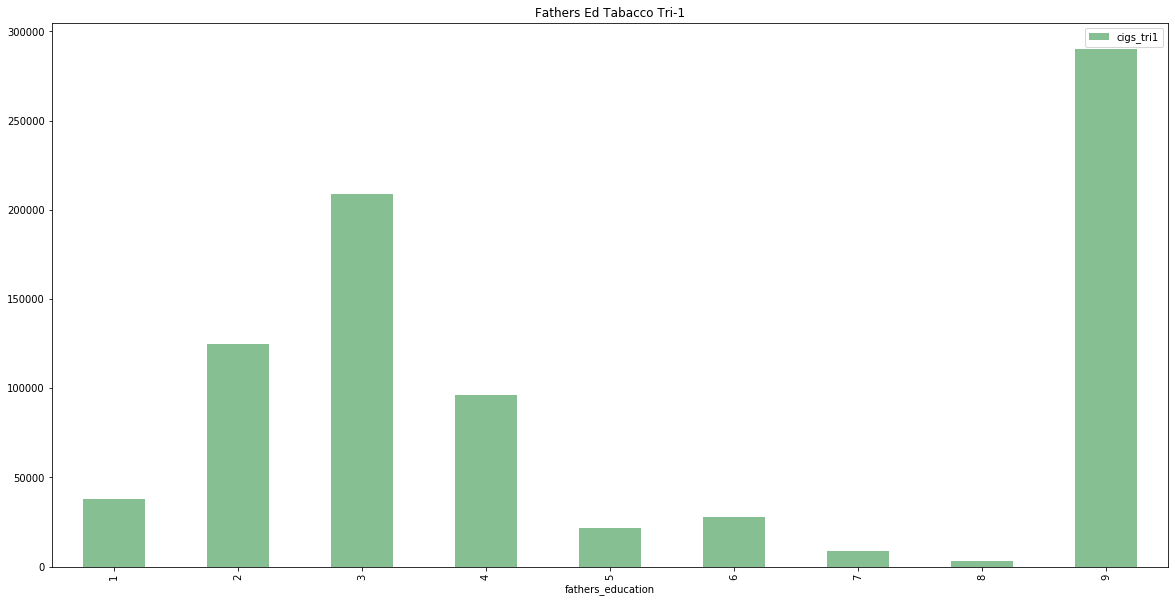

In [152]:
fathers_ed_tobacco= natality_2018.groupby(["fathers_education"])[["cigs_tri1", "cigs_tri2", "cigs_tri3"]].sum()
fathers_ed_tobacco['fathers_education']= fathers_ed_tobacco.index
fathers_ed_tobacco
father_ed= fathers_ed_tobacco.plot.bar(x="fathers_education", y="cigs_tri1", title="Fathers Ed Tabacco Tri-1", figsize=(20,10), color='#86bf91')

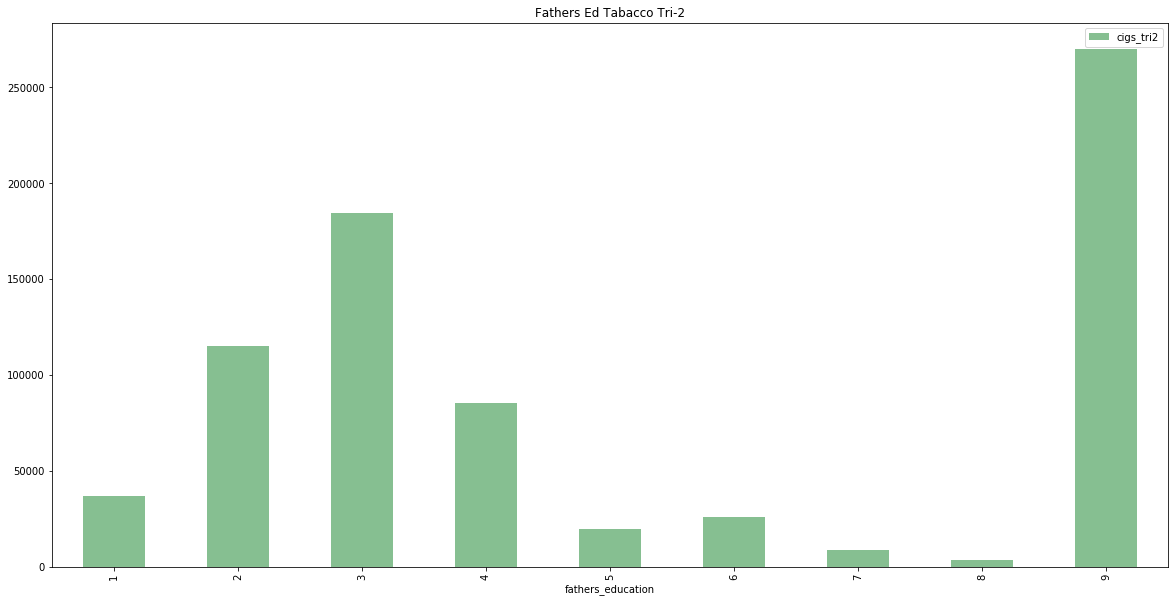

In [153]:
father_ed= fathers_ed_tobacco.plot.bar(x="fathers_education", y="cigs_tri2", title="Fathers Ed Tabacco Tri-2", figsize=(20,10), color='#86bf91')

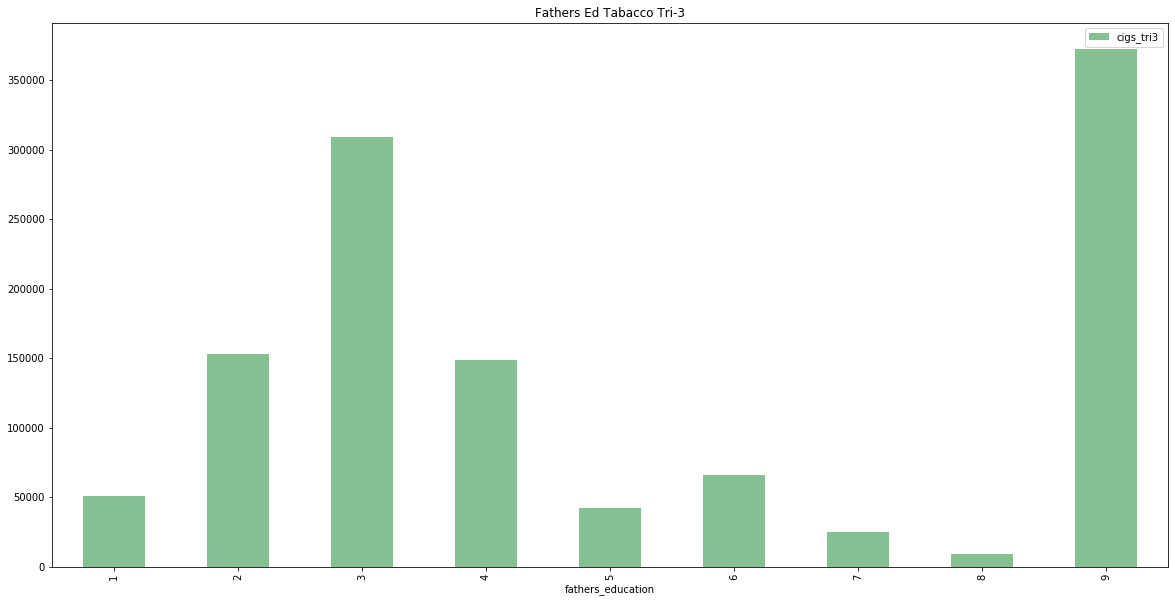

In [154]:
father_ed= fathers_ed_tobacco.plot.bar(x="fathers_education", y="cigs_tri3", title="Fathers Ed Tabacco Tri-3", figsize=(20,10), color='#86bf91')

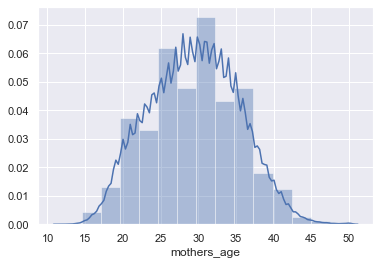

In [63]:
sns.distplot(natality_2018.mothers_age, bins = 15)

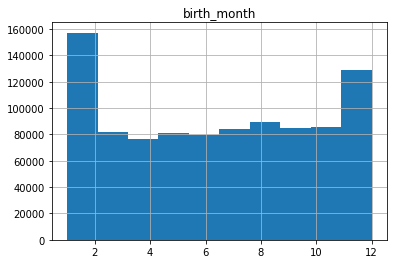

In [52]:
birth_month= natality_2018.hist(column= 'birth_month')

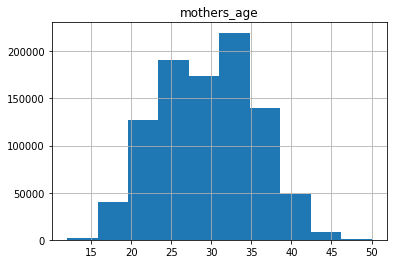

In [11]:
mother_age= natality_2018.hist(column= 'mothers_age')

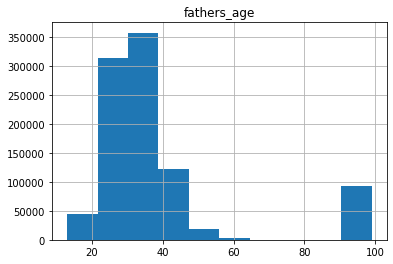

In [12]:
mother_age= natality_2018.hist(column= 'fathers_age')

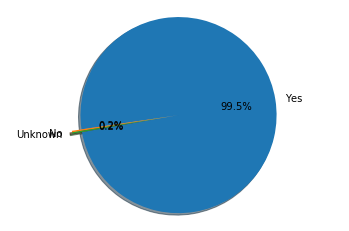

In [24]:
# gonorrhea data
labels = 'Yes', 'No', 'Unknown'
sizes = [945925, 2348, 2110] #proportion of the data 
colors = ['red', 'blue', 'green']
explode = (0.1, 0, 0)

# Plot 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.1f%%',
        shadow=True, startangle=190)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

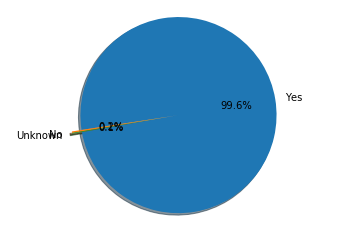

In [25]:
# syphilis data
labels = 'Yes', 'No', 'Unknown'
sizes = [946849, 2348, 1186] #proportion of the data 
colors = ['red', 'blue', 'green']
explode = (0.1, 0, 0)

# Plot 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.1f%%',
        shadow=True, startangle=190)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

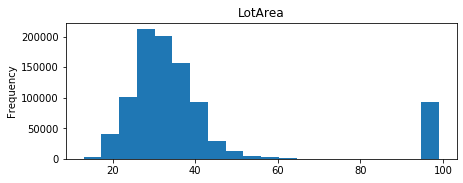

In [22]:
# print a histogram graph of the LotArea (gonna switch this up to another column)
natality_2018['fathers_age'].plot.hist(
    title='LotArea',  # title of graph
    bins=20,          # do 20 bins
    figsize=(7,2.5),  # graph size: 7 inches wide by 2.5 inches high
)



COLUMN: "combined_gestation_wk"
MAX:  99
MIN:  17
NaN:  0


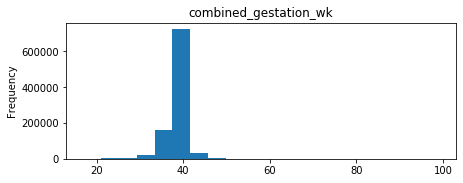

In [14]:
#### this code below does what was done above, but for a lot of columns 
# Print information about the non-categorical columns
# for each of those columns, print out the max and min
# values, and the number of NaN. Also print a histogram
import matplotlib.pyplot as plt
columns_with_numbers = ['combined_gestation_wk']
for c in columns_with_numbers:
    print('\nCOLUMN: "{}"\n=============================='.format(c))
    print('MAX:  {}'.format(natality_2018[c].max()))
    print('MIN:  {}'.format(natality_2018[c].min()))
    print('NaN:  {}'.format(natality_2018[c].isna().sum()))
    natality_2018[c].plot.hist(title=c, bins=20, figsize=(7,2.5))
    plt.show()
    print('\n')

In [102]:
WIC

,Notes,State of Residence,State of Residence Code,Mother's Education,Mother's Education Code,Father's Education,Father's Education Code,WIC,WIC Code,Ten Minute APGAR Score,Ten Minute APGAR Score Code,Births
0,NaN,Alabama,1,8th grade or less,1,8th grade or less,1,Yes,1,12,88,2663
1,NaN,Alabama,1,8th grade or less,1,8th grade or less,1,No,2,12,88,478
2,NaN,Alabama,1,8th grade or less,1,8th grade or less,1,Unknown or Not Stated,9,12,88,33
3,NaN,Alabama,1,8th grade or less,1,9th through 12th grade with no diploma,2,Yes,1,12,88,556
4,NaN,Alabama,1,8th grade or less,1,9th through 12th grade with no diploma,2,No,2,12,88,131
...,...,...,...,...,...,...,...,...,...,...,...,...
12621,NaN,Wyoming,56,"Doctorate (PhD, EdD) or Professional Degree (M...",8,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,No,2,12,88,57
12622,NaN,Wyoming,56,"Doctorate (PhD, EdD) or Professional Degree (M...",8,"Doctorate (PhD, EdD) or Professional Degree (M...",8,No,2,12,88,88
12623,NaN,Wyoming,56,Unknown or Not Stated,9,"Some college credit, but not a degree",4,No,2,12,88,15
12624,NaN,Wyoming,56,Unknown or Not Stated,9,11,Unk,Yes,1,12,88,39


In [114]:
WIC["Ten Minute APGAR Score"]= WIC["Ten Minute APGAR Score"].astype('int32')

In [115]:
WIC["Mother's Education Code"]= WIC["Mother's Education Code"].astype('int32')

In [119]:
WIC["Father's Education Code"]= WIC["Father's Education Code"].astype('int32')

In [112]:
def wic_terms(x): 
    if 'Unk' == x:
        x= 9
    elif 'Unknown or Not Stated' == x:
        x= 11
    elif 'Not Applicable' == x:
        x= 12
    else: 
        pass
    
    return x
    

In [118]:
wic_history = ["Mother's Education Code", "Father's Education Code", "Ten Minute APGAR Score"]
for wic_history in wic_history:
    WIC[wic_history] = WIC[wic_history].apply(wic_terms)

In [150]:
import statistics

WIC.groupby('WIC')[["Mother's Education Code", "Father's Education Code", "Ten Minute APGAR Score", "Births"]].agg(lambda x: x.value_counts().index[0])
#Mode showing the most common type of education that is there for the mother and father when using WIC, along with
#what the apgar scores most commonly is based on whether or not WIC was used. 

,Mother's Education Code,Father's Education Code,Ten Minute APGAR Score,Births
WIC,,,,
No,6,3,12,10
Unknown or Not Stated,3,9,12,11
Yes,3,3,12,10


In [156]:
WIC.groupby(["State of Residence", "WIC"])[["Mother's Education Code", "Father's Education Code", "Births", "Ten Minute APGAR Score"]].mean()
#Average parental education, births and APGAR score shown in every state depending on whether or not WIC was used. 

Mother's Education Code  \
State of Residence WIC                                              
Alabama            No                                    4.437500   
                   Unknown or Not Stated                 4.045455   
                   Yes                                   3.935780   
Alaska             No                                    4.800000   
                   Unknown or Not Stated                 4.916667   
...                                                           ...   
Wisconsin          No                                    4.769784   
                   Unknown or Not Stated                 4.428571   
                   Yes                                   4.158537   
Wyoming            No                                    4.721311   
                   Yes                                   4.000000   

                                          Father's Education Code      Births  \
State of Residence WIC                                                          
Alabama            No                                    5.187500  886.625000   
                   Unknown or Not Stated                 5.000000   26.909091   
                   Yes                                   5.091743  810.816514   
Alaska             No                                    5.138462  309.661538   
                   Unknown or Not Stated                 5.833333   24.000000   
...                                                           ...         ...   
Wisconsin          No                                    5.647482  987.539568   
                   Unknown or Not Stated                 5.514286   67.542857   
                   Yes                                   5.951220  662.426829   
Wyoming            No                                    5.147541  241.245902   
                   Yes                                   4.950000  138.225000   

                                          Ten Minute APGAR Score  
State of Residence WIC                                            
Alabama            No                                  10.583333  
                   Unknown or Not Stated               11.954545  
                   Yes                                  9.990826  
Alaska             No                                  11.815385  
                   Unknown or Not Stated               12.000000  
...                                                          ...  
Wisconsin          No                                   9.791367  
                   Unknown or Not Stated               11.971429  
                   Yes                                 10.597561  
Wyoming            No                                  11.901639  
                   Yes                                 12.000000  

[152 rows x 4 columns]

In [154]:
WIC.groupby("State of Residence")[["Ten Minute APGAR Score", "Births"]].agg(lambda x: x.value_counts().index[0])
#Most common level of births in every state and most common APGAR score associated with every state. 

,Ten Minute APGAR Score,Births
State of Residence,,
Alabama,12,10
Alaska,12,10
Arizona,12,11
Arkansas,12,10
California,12,10
Colorado,12,10
Connecticut,12,10
Delaware,12,13
District of Columbia,12,13
